# Reciprocal Pairs Synapse Visualizer
Pairs of neurons in the Layer 2/3 volume that synapse onto one another

This notebook is modified from Allen Institute tutorial on working with Meshes by Forrest Collman  
The original tutorial is located here: https://github.com/AllenInstitute/MicronsBinder/blob/master/notebooks/intro/MeshExample.ipynb

You will need to run this notebook in a Python 3.7 environment  
Sometime meshparty will have a conflict with other tools and not work properly in Anaconda  
If that happens, you will need to start over with a new Anaconda environment  
Install allensdk first, then meshparty, then any other other tools desired  
The installation described below worked well:
* Install new environment v3.7 in Anaconda
* conda install jupyter
* pip install allensdk
* pip install meshparty
* pip install caveclient
* pip install 'itkwidgets[notebook]>=1.0a8'
* pip install --upgrade --pre itk
* pip install gdown

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [2]:
from meshparty import trimesh_io, trimesh_vtk, skeleton, utils

In [3]:
# setup the mesh meta to handle downloads and caching
mesh_dir = 'data/neuron_meshes_v185/' # or change to your desired folder
seg_source = "precomputed://https://storage.googleapis.com/microns_public_datasets/pinky100_v185/seg"
mm = trimesh_io.MeshMeta(cv_path=seg_source,
                         disk_cache_path=mesh_dir, 
                         cache_size=20)

## Enter two neurons that synapse onto one another
Use the `list_of_all_reciprocal_pairs.ipynb`notebook to look up reciprocal pairs of neurons.  
Use the `reciprocal_pairs_neurons_with_some_in_volume.ipynb` to look up pairs that have an identified soma in the volume.  
Special thanks to Wanwen Zeng at Stanford for generating the dataframe in the `paired.csv` file. 

In [4]:
cell_id1 = 648518346349539846  
cell_id2 = 648518346349533058

# some interesting reciprocal pairs
# cell_id1 = 648518346349539846  cell_id2 = 648518346349533058 inhibitory basket neuron and excitatory pyramidal neuron with highest number 7+14=21 of reciprocal synapses
# cell_id1 = 648518346349528994  cell_id2 = 648518346349538192 two neurons with 2nd highest number of reciprocal synapses in volume (n=17 + n=3 = 20)
# cell_id1 = 648518346349528994  cell_id2 = 648518346349539539 two neurons (one basket and one pyr) with 18 reciprocal synapses (2+16)
# cell_id1 = 648518346349539215  cell_id2 = 648518346349539464 one basket and one pyr with 2+15 reciprocal synapses
# cell_id1 = 648518346349539846  cell_id2 = 648518346349538179 inhibitory Basket and inhibitory Martinotti neurons
# cell_id1 = 648518346349538179  cell_id2 = 648518346349515986 inhibitory Martinotti and inhibitory bipolar neurons
# cell_id1 = 648518346349538179  cell_id2 = 648518346349533227 inhibitory Martinotti and excitatory pyramidal neurons
# cell_id1 = 648518346343899987  cell_id2 = 648518346343998088 partial axons synapsing onto one another
# cell_id1 = 648518346349376348  cell_id2 = 648518346349384302 partial axon and spiny dendrite with dense processes; syn id 6908527 appears to be a segmentation error
# cell_id1 = 648518346349540055  cell_id2 = 648518346344132118 pre-synaptic site on a dendritic spine (mis-segmentation?)
# cell_id1 = 648518346349515985  cell_id2 = 648518346349516055 two inhibitory cells of unknown type
# cell_id1 = 648518346349536744  cell_id2 = 648518346341407207 pyramidal neuron and partial unknown neuron
# cell_id1 = 648518346349518096  cell_id2 = 648518346342923789 inhibitory neuron of unknown type and partial processes of other unknown type
# cell_id1 = 648518346349538179  cell_id2 = 648518346349537400 partial exc pyr neuron and Martinotti inhibitory neuron


In [5]:
# If you get an error, run the next cell to download the mesh, then rerun this cell again
seg_id = cell_id1
mesh_file = os.path.join(mesh_dir, str(seg_id)+'.h5')
mesh = mm.mesh(filename = mesh_file)

In [6]:
# If you get an error on the previous cell, run this cell
# After the mesh is successfully downloaded, rerun the previous cell 
downloadmesh1 = mm.mesh(seg_id = seg_id, remove_duplicate_vertices=True)

In [7]:
seg_id

648518346349539846

In [8]:
mesh_file

'data/neuron_meshes_v185/648518346349539846.h5'

In [9]:
mesh.n_vertices, mesh.n_faces

(1305068, 2607764)

In [10]:
# If you get an error, run the next cell to download the mesh, then rerun this cell again
second_seg_id = cell_id2
second_mesh = mm.mesh(seg_id = second_seg_id, remove_duplicate_vertices=True)

In [11]:
# If you get an error on the previous cell, run this cell
# After the mesh is successfully downloaded, rerun the previous cell 
downloadmesh2 = mm.mesh(seg_id = second_seg_id, remove_duplicate_vertices=True)

In [12]:
second_seg_id

648518346349533058

In [13]:
second_mesh.n_vertices

1644011

In [14]:
# read in the full synapse table
soma_subgraph_df = pd.read_csv('data/pni_synapses_v185.csv')

In [15]:
soma_subgraph_df.head()

,id,pre_root_id,post_root_id,cleft_vx,ctr_pt_x_nm,ctr_pt_y_nm,ctr_pt_z_nm,pre_pos_x_vx,pre_pos_y_vx,pre_pos_z_vx,ctr_pos_x_vx,ctr_pos_y_vx,ctr_pos_z_vx,post_pos_x_vx,post_pos_y_vx,post_pos_z_vx
0,2715757,648518346349538285,648518346349536759,1103,280784,261896,40600,70050,65534,1015,70196,65474,1015,70104,65602,1015
1,12498,648518346342404863,648518346342414574,62,365832,292808,25800,91472,73196,645,91458,73202,645,91396,73216,645
2,12500,648518346342921567,648518346345323296,62,229144,155952,48080,57250,39028,1202,57286,38988,1202,57312,38966,1203
3,12517,648518346342796822,648518346349537255,955,398452,208560,50760,99538,52184,1276,99613,52140,1269,99550,52098,1276
4,12503,648518346342800412,648518346348190542,718,461868,245212,53560,115462,61350,1335,115467,61303,1339,115468,61296,1335


In [16]:
# filter all the pre- and post- synapses for cell_id1
cell_post_subgraph_all = soma_subgraph_df.query(f'post_root_id=={seg_id}') #this shows all post-syn sites on seg_id cell
cell_pre_subgraph_all = soma_subgraph_df.query(f'pre_root_id=={seg_id}') #this one shows all pre-syn sites on the axon of seg_id cell

# make an array of xyz synapse positions
postsyn_xyz_all=cell_post_subgraph_all[['ctr_pt_x_nm', 'ctr_pt_y_nm', 'ctr_pt_z_nm']].values
presyn_xyz_all=cell_pre_subgraph_all[['ctr_pt_x_nm', 'ctr_pt_y_nm', 'ctr_pt_z_nm']].values

(302312.03125, 143993.71875)

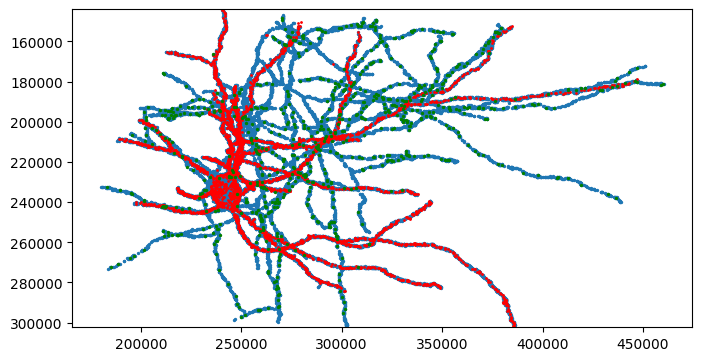

In [17]:
f,ax = plt.subplots(figsize=(8,8))
ax.scatter(mesh.vertices[::50,0], mesh.vertices[::50,1], s=2, alpha=1) # modify s and alpha to improve the visualization

ax.scatter(postsyn_xyz_all[:,0], postsyn_xyz_all[:,1], c='red', s=1, alpha=1) # modify c, s, and alpha if desired
ax.set_aspect('equal')
ax.set_ylim(np.max(mesh.vertices[:,1]), np.min(mesh.vertices[:,1]))

ax.scatter(presyn_xyz_all[:,0], presyn_xyz_all[:,1], c='green', s=2, alpha=1) # modify c, s, and alpha if desired
ax.set_aspect('equal')
ax.set_ylim(np.max(mesh.vertices[:,1]), np.min(mesh.vertices[:,1]))

In [18]:
len(postsyn_xyz_all)

3172

In [19]:
len(presyn_xyz_all)

761

In [20]:
# this field will create a df that only reveals the second_seg_id (pre) synapses onto the seg_id (post) neuron
pre_to_post_only = soma_subgraph_df["pre_root_id"] == second_seg_id

In [21]:
pre_to_post_only_df=soma_subgraph_df.loc[pre_to_post_only, ["id", "pre_root_id", "post_root_id", "cleft_vx", "ctr_pt_x_nm", "ctr_pt_y_nm", "ctr_pt_z_nm", "pre_pos_x_vx", "pre_pos_y_vx", "pre_pos_z_vx", "ctr_pos_x_vx", "ctr_pos_y_vx", "ctr_pos_z_vx", "post_pos_x_vx", "post_pos_y_vx", "post_pos_z_vx"]]

In [22]:
pre_to_post_only_df # this lists all of the second_seg_id (pre) synapses

,id,pre_root_id,post_root_id,cleft_vx,ctr_pt_x_nm,ctr_pt_y_nm,ctr_pt_z_nm,pre_pos_x_vx,pre_pos_y_vx,pre_pos_z_vx,ctr_pos_x_vx,ctr_pos_y_vx,ctr_pos_z_vx,post_pos_x_vx,post_pos_y_vx,post_pos_z_vx
30251,105763,648518346349533058,648518346347002482,69,288496,204160,43560,72048,51024,1089,72124,51040,1089,72108,50952,1091
38713,107783,648518346349533058,648518346349537672,99,277676,244020,62320,69434,61022,1557,69419,61005,1558,69366,60964,1558
47748,3785,648518346349533058,648518346349538715,62,278416,252424,28840,69646,63086,721,69604,63106,721,69558,63120,721
140934,308619,648518346349533058,648518346349539572,87,321912,265128,5880,80412,66256,147,80478,66282,147,80504,66306,147
149103,101474,648518346349533058,648518346346590795,308,278020,226184,15840,69492,56580,397,69505,56546,396,69500,56492,397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3125041,3281831,648518346349533058,648518346349538336,363,278096,215344,16880,69482,53810,421,69524,53836,422,69486,53850,424
3125042,3350380,648518346349533058,648518346349539846,324,302952,259032,50000,75696,64704,1249,75738,64758,1250,75672,64802,1249
3125101,6,648518346349533058,648518346342805464,714,224096,170676,62480,56020,42658,1566,56024,42669,1562,55970,42702,1566
3140510,1217335,648518346349533058,648518346349530199,182,342784,274968,42680,85670,68770,1066,85696,68742,1067,85720,68692,1066


The following cell should now filter it so that we only reveal the synapses of second_seg_id (pre) onto seg_id (post)

In [23]:
# this cell and the next will reveal the second_seg_id synapses (pre) onto the seg_id (post) cell
cell_post_subgraph_recip = pre_to_post_only_df.query(f'post_root_id=={seg_id}')

# make an array of xyz synapse positions
postsyn_xyz_recip=cell_post_subgraph_recip[['ctr_pt_x_nm', 'ctr_pt_y_nm', 'ctr_pt_z_nm']].values

In [24]:
len(pre_to_post_only_df.query(f'post_root_id=={seg_id}'))

7

In [25]:
pre_to_post_only_df.query(f'post_root_id=={seg_id}')[["ctr_pos_x_vx","ctr_pos_y_vx","ctr_pos_z_vx"]]

,ctr_pos_x_vx,ctr_pos_y_vx,ctr_pos_z_vx
1386673,69594,56638,610
1838815,77040,65500,995
2043044,68878,65266,1280
2549763,69533,66043,1199
2993942,67948,64956,1397
3024991,69398,52798,1635
3125042,75738,64758,1250


(302312.03125, 143993.71875)

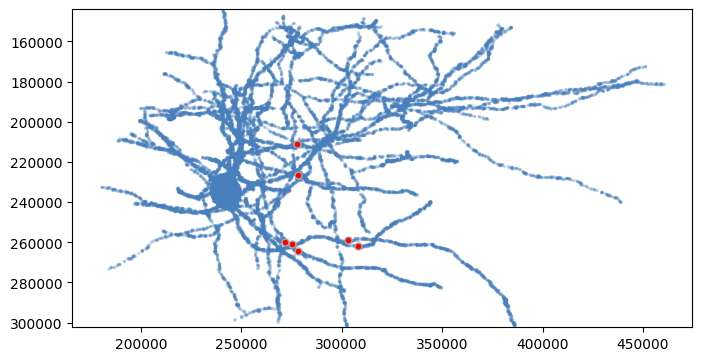

In [26]:
f,ax = plt.subplots(figsize=(8,8))
ax.scatter(mesh.vertices[::50,0], mesh.vertices[::50,1], c='#4780BD', s=2, alpha=0.2) # modify s and alpha to improve the visualization

ax.scatter(postsyn_xyz_recip[:,0], postsyn_xyz_recip[:,1], c='red', edgecolors='darkgrey', s=25, alpha=1) # modify c, s, and alpha if desired
ax.set_aspect('equal')
ax.set_ylim(np.max(mesh.vertices[:,1]), np.min(mesh.vertices[:,1]))

# 3D visualization
Your computer will need OpenGL installed in order for this tool to work  
It will open in a separate window

In [27]:
import vtk

In [28]:
#create vtk actors for each mesh and one for their shared synapses
mesh_actor = trimesh_vtk.mesh_actor(second_mesh, opacity=.3, color=(0.7, 0.7, 0.7))
pre_mesh_actor = trimesh_vtk.mesh_actor(mesh, opacity=.3, color=(0.2, 0.4, 0.7))
syn_actor = trimesh_vtk.point_cloud_actor(postsyn_xyz_recip, size=1500, color=(0.9, 0.2, 0.2)) 

#creating a camera object and defining the view
camera = trimesh_vtk.oriented_camera(mesh.centroid, backoff=400)

#render the actors, will open a pop up python window
trimesh_vtk.render_actors([mesh_actor,syn_actor,pre_mesh_actor], camera=camera)

setting up renderer
done setting up
actors added
camera set
render done
finalizing..


<vtkmodules.vtkRenderingOpenGL2.vtkOpenGLRenderer(0x000001C306CD4E40) at 0x000001C32BAF6948>

# In the following cells, the cell_ids are reversed

In [29]:
recip1 = cell_id2  
recip2 = cell_id1

In [30]:
# Read mesh off disk
rseg_id = recip1
rmesh_file = os.path.join(mesh_dir, str(rseg_id)+'.h5')
rmesh = mm.mesh(filename = rmesh_file)

In [31]:
mesh.n_vertices, mesh.n_faces

(1305068, 2607764)

In [32]:
rsecond_seg_id = recip2
rsecond_mesh = mm.mesh(seg_id = rsecond_seg_id, remove_duplicate_vertices=True)

In [33]:
second_mesh.n_vertices

1644011

In [34]:
# this cell and the next one will show all synapses on the seg_id (presynaptic) cell and color code them by post-synaptic sites (red)
# and pre-synaptic sites (green); the latter will predominately be on the axon (efferent) 
# filter the synapses onto this cell
rcell_post_subgraph_all = soma_subgraph_df.query(f'post_root_id=={rseg_id}') #this shows all post-syn sites on seg_id cell
rcell_pre_subgraph_all = soma_subgraph_df.query(f'pre_root_id=={rseg_id}') #this one shows all pre-syn sites on the axon of seg_id cell

# make an array of xyz synapse positions
rpostsyn_xyz_all=rcell_post_subgraph_all[['ctr_pt_x_nm', 'ctr_pt_y_nm', 'ctr_pt_z_nm']].values
rpresyn_xyz_all=rcell_pre_subgraph_all[['ctr_pt_x_nm', 'ctr_pt_y_nm', 'ctr_pt_z_nm']].values

(302312.03125, 143993.71875)

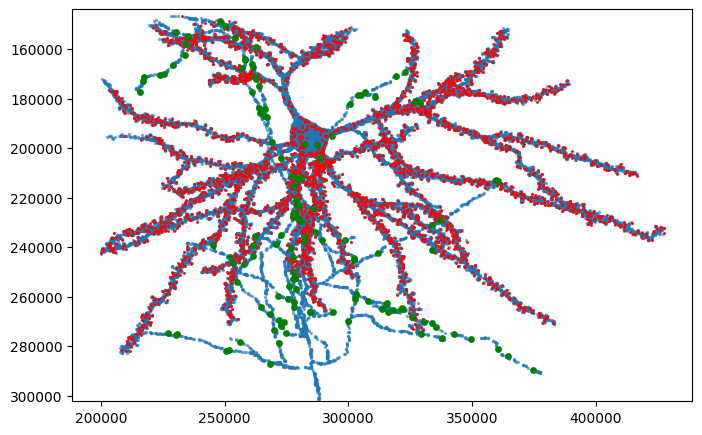

In [35]:
f,ax = plt.subplots(figsize=(8,8))
ax.scatter(rmesh.vertices[::50,0], rmesh.vertices[::50,1], s=2, alpha=0.5) # modify s and alpha to improve the visualization

ax.scatter(rpostsyn_xyz_all[:,0], rpostsyn_xyz_all[:,1], c='red', s=1, alpha=1) # modify c, s, and alpha if desired
ax.set_aspect('equal')
ax.set_ylim(np.max(mesh.vertices[:,1]), np.min(mesh.vertices[:,1]))

ax.scatter(rpresyn_xyz_all[:,0], rpresyn_xyz_all[:,1], c='green', s=15, alpha=1) # modify c, s, and alpha if desired
ax.set_aspect('equal')
ax.set_ylim(np.max(mesh.vertices[:,1]), np.min(mesh.vertices[:,1]))

In [36]:
len(rpostsyn_xyz_all)

3381

In [37]:
len(rpresyn_xyz_all)

135

In [38]:
# this field will create a df that only reveals the second_seg_id (pre) synapses onto the seg_id (post) neuron
rpre_to_post_only = soma_subgraph_df["pre_root_id"] == rsecond_seg_id

In [39]:
rpre_to_post_only_df=soma_subgraph_df.loc[rpre_to_post_only, ["id", "pre_root_id", "post_root_id", "cleft_vx", "ctr_pt_x_nm", "ctr_pt_y_nm", "ctr_pt_z_nm", "pre_pos_x_vx", "pre_pos_y_vx", "pre_pos_z_vx", "ctr_pos_x_vx", "ctr_pos_y_vx", "ctr_pos_z_vx", "post_pos_x_vx", "post_pos_y_vx", "post_pos_z_vx"]]

In [40]:
rpre_to_post_only_df # this lists all of the second_seg_id (pre) synapses

,id,pre_root_id,post_root_id,cleft_vx,ctr_pt_x_nm,ctr_pt_y_nm,ctr_pt_z_nm,pre_pos_x_vx,pre_pos_y_vx,pre_pos_z_vx,ctr_pos_x_vx,ctr_pos_y_vx,ctr_pos_z_vx,post_pos_x_vx,post_pos_y_vx,post_pos_z_vx
3874,58267,648518346349539846,648518346349537300,66,268024,238480,68040,66954,59610,1701,67006,59620,1701,67050,59620,1700
11362,56542,648518346349539846,648518346349531254,66,305896,180416,40080,76512,45142,1001,76474,45104,1002,76434,45066,1001
11750,905786,648518346349539846,648518346349538239,145,238424,243936,49840,59556,61022,1246,59606,60984,1246,59598,60960,1247
11798,57181,648518346349539846,648518346344460692,66,216696,215768,65680,54134,53928,1641,54174,53942,1642,54200,53950,1643
14149,137081,648518346349539846,648518346349537959,72,458872,181464,15680,114678,45312,390,114718,45366,392,114712,45388,390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3220604,1970298,648518346349539846,648518346349536809,333,292776,198496,5720,73174,49666,141,73194,49624,143,73156,49568,141
3220665,2314764,648518346349539846,648518346349536809,495,289920,199832,1840,72418,50020,42,72480,49958,46,72410,49918,42
3221257,3483615,648518346349539846,648518346349536809,56,305480,181448,37520,76348,45418,938,76370,45362,938,76336,45314,938
3221393,872962,648518346349539846,648518346349537167,141,280840,158216,19800,70216,39588,493,70210,39554,495,70192,39514,493


In [41]:
# this cell and the next will reveal the second_seg_id synapses (pre) onto the seg_id (post) cell
# if there are none, the display will not have any dots to indicate the synapses (since it is zero)
rcell_post_subgraph_recip = rpre_to_post_only_df.query(f'post_root_id=={rseg_id}')

# make an array of xyz synapse positions
rpostsyn_xyz_recip = rcell_post_subgraph_recip[['ctr_pt_x_nm', 'ctr_pt_y_nm', 'ctr_pt_z_nm']].values

In [42]:
len(rpre_to_post_only_df.query(f'post_root_id=={rseg_id}'))

14

In [43]:
rpre_to_post_only_df.query(f'post_root_id=={rseg_id}')[["ctr_pos_x_vx","ctr_pos_y_vx","ctr_pos_z_vx"]]

,ctr_pos_x_vx,ctr_pos_y_vx,ctr_pos_z_vx
794197,71476,53713,502
897276,64180,53336,881
1321422,62910,49276,1214
1504924,71872,51293,633
1512969,72610,49416,781
1591235,70156,49868,581
2152898,72432,50492,718
2924791,78568,55644,1546
2924792,64343,53582,860
2924793,72350,50930,671


(302312.03125, 143993.71875)

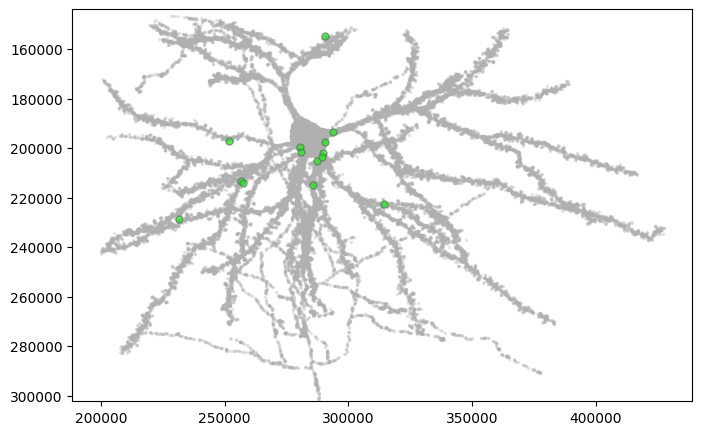

In [44]:
f,ax = plt.subplots(figsize=(8,8))
ax.scatter(rmesh.vertices[::50,0], rmesh.vertices[::50,1], c="#B0B0B0", s=2, alpha=0.25) # modify c, s and alpha to improve the visualization

ax.scatter(rpostsyn_xyz_recip[:,0], rpostsyn_xyz_recip[:,1], c='lime', edgecolors='dimgrey', s=25, alpha=0.7) # modify c, s, and alpha if desired
ax.set_aspect('equal')
ax.set_ylim(np.max(mesh.vertices[:,1]), np.min(mesh.vertices[:,1]))

In [45]:
# 3d visualization using vtk

#create vtk actors for each mesh and one for their shared synapses
rmesh_actor = trimesh_vtk.mesh_actor(rmesh, opacity=.3, color=(0.7, 0.7, 0.7))
rpre_mesh_actor = trimesh_vtk.mesh_actor(rsecond_mesh, opacity=.3, color=(0.2, 0.4, 0.7))
rsyn_actor = trimesh_vtk.point_cloud_actor(rpostsyn_xyz_recip, size=1500, color=(0.2, 0.9, 0.2)) 

#creating a camera object and defining the view
camera = trimesh_vtk.oriented_camera(mesh.centroid, backoff=400)

#render the actors, will open a pop up python window
trimesh_vtk.render_actors([rmesh_actor,rsyn_actor,rpre_mesh_actor], camera=camera)

setting up renderer
done setting up
actors added
camera set
render done
finalizing..


<vtkmodules.vtkRenderingOpenGL2.vtkOpenGLRenderer(0x000001C306CD6680) at 0x000001C32BA7B528>

# 3D visualization of reciprocal synapses

In [46]:
# 3d visualization using vtk

#create vtk actors for each mesh and one for their shared synapses
rmesh_actor = trimesh_vtk.mesh_actor(rmesh, opacity=.2, color=(0.7, 0.7, 0.7))
rpre_mesh_actor = trimesh_vtk.mesh_actor(rsecond_mesh, opacity=.2, color=(0.2, 0.4, 0.7))
rsyn_actor = trimesh_vtk.point_cloud_actor(rpostsyn_xyz_recip, opacity=0.9, size=250, color=(0.2, 0.9, 0.2))
syn_actor = trimesh_vtk.point_cloud_actor(postsyn_xyz_recip, opacity=0.9, size=250, color=(0.9, 0.2, 0.2))

#creating a camera object and defining the view
camera = trimesh_vtk.oriented_camera(mesh.centroid, backoff=400)

#render the actors, will open a pop up python window
trimesh_vtk.render_actors([rmesh_actor,rsyn_actor,syn_actor, rpre_mesh_actor], camera=camera)

setting up renderer
done setting up
actors added
camera set
render done
finalizing..


<vtkmodules.vtkRenderingOpenGL2.vtkOpenGLRenderer(0x000001C306CD5A60) at 0x000001C32BAF6288>